In [4]:
import tensorflow as tf

In [2]:
from tensorflow import keras

In [13]:
from tensorflow.keras import layers


In [14]:
import matplotlib.pyplot as plt
import numpy as np

In [49]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

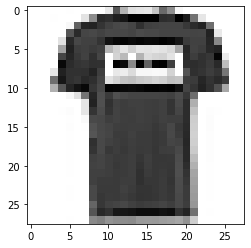

In [17]:
plt.imshow(x_train[1],cmap='Greys')

In [50]:
x_test.shape

(10000, 28, 28)

In [51]:
x_train=x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [52]:
# Make sure images have shape (28, 28, 1)
x_train=np.expand_dims(x_train,-1)
x_test=np.expand_dims(x_test,-1)

In [53]:
x_test.shape

(10000, 28, 28, 1)

In [54]:
y_train = keras.utils.to_categorical(y_train,num_classes=10)
y_test = keras.utils.to_categorical(y_test,num_classes=10)

In [55]:
y_train[1]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [63]:
imput_shape=(28,28,1)
num_class=10
model =keras.Sequential([
    layers.Input(imput_shape),
    layers.Conv2D(32,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,kernel_size=(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dropout(0.5),
    layers.Dense(num_class,activation='softmax')]
)

In [64]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dropout_1 (Dropout)         (None, 1600)              0

In [65]:
batch_size=128
epoch=15
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [66]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=epoch, validation_split=0.1)


Epoch 1/15
422/422 [==============================] - 43s 100ms/step - loss: 0.6936 - accuracy: 0.7491 - val_loss: 0.4444 - val_accuracy: 0.8352
Epoch 2/15
422/422 [==============================] - 42s 99ms/step - loss: 0.4562 - accuracy: 0.8365 - val_loss: 0.3902 - val_accuracy: 0.8593
Epoch 3/15
422/422 [==============================] - 48s 113ms/step - loss: 0.4130 - accuracy: 0.8513 - val_loss: 0.3750 - val_accuracy: 0.8680
Epoch 4/15
422/422 [==============================] - 47s 112ms/step - loss: 0.3830 - accuracy: 0.8622 - val_loss: 0.3448 - val_accuracy: 0.8758
Epoch 5/15
422/422 [==============================] - 45s 108ms/step - loss: 0.3617 - accuracy: 0.8706 - val_loss: 0.3348 - val_accuracy: 0.8798
Epoch 6/15
422/422 [==============================] - 45s 107ms/step - loss: 0.3435 - accuracy: 0.8757 - val_loss: 0.3076 - val_accuracy: 0.8862
Epoch 7/15
422/422 [==============================] - 42s 99ms/step - loss: 0.3322 - accuracy: 0.8804 - val_loss: 0.3045 - val_accu

In [67]:
score = model.evaluate(x_test,y_test)
print('test loss:',score[0])
print('test accuracy:', score[1])

313/313 [==============================] - 3s 9ms/step - loss: 0.2771 - accuracy: 0.8991
test loss: 0.27708983421325684
test accuracy: 0.8991000056266785
